In [1]:
import numpy as np
import pandas as pd

In [2]:
banglore = pd.read_csv('Banglore Housing Prices.csv')
banglore

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [3]:
banglore.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [4]:
banglore.dropna(subset=['location'],inplace=True)

In [5]:
banglore.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
banglore.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [7]:
banglore['bath'].fillna(banglore['bath'].mode()[0], inplace=True)
banglore['size'].fillna(banglore['size'].mode()[0], inplace=True)

In [8]:
banglore.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
def transform(x):
    if isinstance(x,str):
        return x.split()[0]
    else:
        return x

In [10]:
banglore['size'] = banglore['size'].apply(transform)

In [11]:
banglore

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [12]:
def convert(x):
    if '-' in x:
        num = x.split('-')
        return (float(num[0]) + float(num[1]))/2
    try:
        return float(x)
    except:
        return 0

In [13]:
banglore['total_sqft'] = banglore['total_sqft'].apply(convert)

In [14]:
banglore

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00
13316,Richards Town,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,488.00


In [15]:
banglore['Price_Per_Sqft'] = banglore['price']/banglore['total_sqft']
banglore

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,51.00,0.042500
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,0.066898
13316,Richards Town,4,3600.0,5.0,400.00,0.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,0.052585
13318,Padmanabhanagar,4,4689.0,4.0,488.00,0.104073


In [16]:
import seaborn as sns

In [17]:
banglore['size'] = banglore['size'].astype(float)

<Axes: >

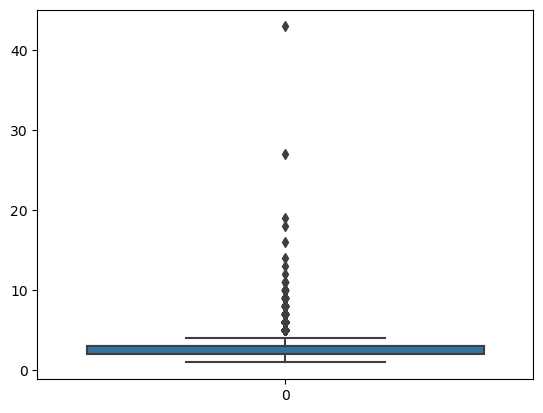

In [18]:
sns.boxplot(banglore['size'])

In [19]:
def outliers(data):
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    return lower,upper

In [20]:
lower_size,upper_size = outliers(banglore['size'])

In [21]:
banglore = banglore[banglore['size']>lower_size]
banglore = banglore[banglore['size']<upper_size]

<Axes: >

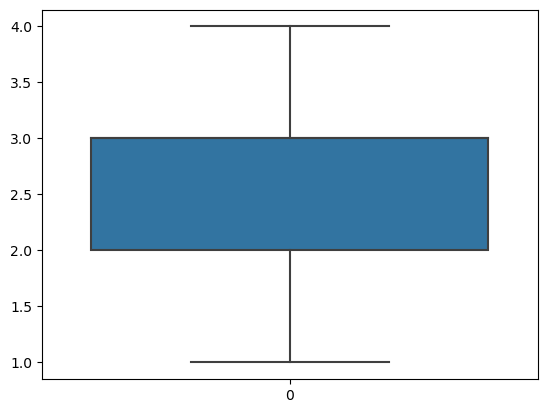

In [22]:
sns.boxplot(banglore['size'])

<Axes: >

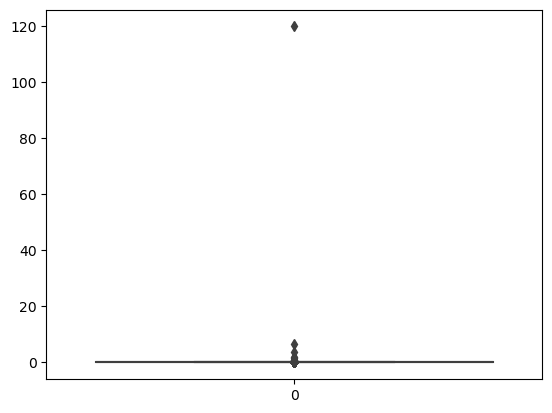

In [23]:
sns.boxplot(banglore['Price_Per_Sqft'])

In [24]:
lower_pps,upper_pps = outliers(banglore['Price_Per_Sqft'])

In [25]:
banglore = banglore[banglore['Price_Per_Sqft']>lower_pps]
banglore = banglore[banglore['Price_Per_Sqft']<upper_pps]

<Axes: >

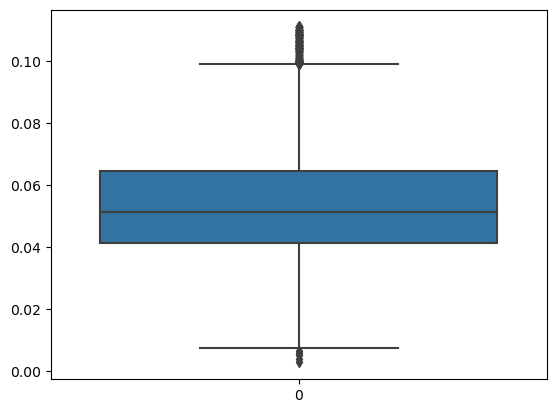

In [26]:
sns.boxplot(banglore['Price_Per_Sqft'])

In [27]:
X = banglore[['total_sqft','size','bath']]
y = banglore['price']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [33]:
mse

2557.097612681213

In [34]:
r2

0.5253536015209881